## Observations and Insights 

In [478]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from itertools import groupby
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

# Combine the data into a single dataset

combined_data = mouse_metadata.merge(study_results,on=["Mouse ID"])

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0000,0
1,k403,Ramicane,Male,21,16,5,38.8259,0
2,k403,Ramicane,Male,21,16,10,35.0143,1
3,k403,Ramicane,Male,21,16,15,34.2240,1
4,k403,Ramicane,Male,21,16,20,32.9977,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.1457,2
1889,z969,Naftisol,Male,9,30,30,65.8410,3
1890,z969,Naftisol,Male,9,30,35,69.1762,4
1891,z969,Naftisol,Male,9,30,40,70.3149,4


In [479]:
# Checking the number of mice.
mouse_total = len(pd.unique(combined_data['Mouse ID']))
mouse_total_df = pd.DataFrame({"Number of Mice": [mouse_total]})
mouse_total_df

,Number of Mice
0,249


In [480]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_df[['Mouse ID', 'Timepoint']]

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [481]:
# Optional: Get all the data for the duplicate mouse ID. 

print(duplicate_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908             45.0000                 0  
909             45.0000                 0  
910             48.7868                 0  
911             47.5704        

In [482]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(
  subset = ['Mouse ID', 'Timepoint'],
  keep = 'last').reset_index(drop = True)

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0000,0
1,k403,Ramicane,Male,21,16,5,38.8259,0
2,k403,Ramicane,Male,21,16,10,35.0143,1
3,k403,Ramicane,Male,21,16,15,34.2240,1
4,k403,Ramicane,Male,21,16,20,32.9977,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.1457,2
1884,z969,Naftisol,Male,9,30,30,65.8410,3
1885,z969,Naftisol,Male,9,30,35,69.1762,4
1886,z969,Naftisol,Male,9,30,40,70.3149,4


In [483]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(pd.unique(clean_df['Mouse ID']))
print(total_mice)

249


## Summary Statistics

In [484]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#create dataframe grouped by regimen
regimen_stats = clean_df.groupby("Drug Regimen")

regimen_stats


In [485]:
#calculate summary stats 
tumor_mean = regimen_stats["Tumor Volume (mm3)"].mean()
tumor_median = regimen_stats["Tumor Volume (mm3)"].median()
tumor_variance = regimen_stats["Tumor Volume (mm3)"].var()
tumor_standarddev = regimen_stats["Tumor Volume (mm3)"].std()
tumor_sem = regimen_stats["Tumor Volume (mm3)"].sem()

#create a new dataframe with the summary stats
summary_stats = pd.DataFrame({"Mean": tumor_mean,
                             "Median": tumor_median,
                             "Variance": tumor_variance,
                             "Standard Deviation": tumor_standarddev,
                             "SEM": tumor_sem})
#print the summary stats
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3830,50.7835,43.2202,6.5742,0.5264
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [486]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary2 = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": [np.mean, np.median,np.var, np.std, st.sem]})
summary2

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin               40.6757 41.5578 24.9478 4.9948 0.3293
Ceftamin                52.5912 51.7762 39.2902 6.2682 0.4698
Infubinol               52.8848 51.8206 43.1287 6.5672 0.4922
Ketapril                55.2356 53.6987 68.5536 8.2797 0.6039
Naftisol                54.3316 52.5093 66.1735 8.1347 0.5965
Placebo                 54.0336 52.2889 61.1681 7.8210 0.5813
Propriva                52.3830 50.7835 43.2202 6.5742 0.5264
Ramicane                40.2167 40.6732 23.4867 4.8463 0.3210
Stelasyn                54.2331 52.4317 59.4506 7.7104 0.5731
Zoniferol               53.2365 51.8185 48.5334 6.9666 0.5164

## Bar and Pie Charts

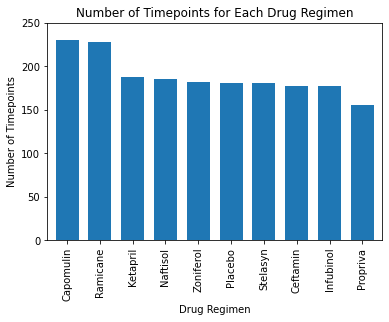

In [492]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = regimen_stats["Timepoint"].count().sort_values(ascending=False).plot.bar(width = 0.7, zorder = 3, title='Number of Timepoints for Each Drug Regimen')
#set the x labls
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Timepoints")
#the bar was higher than the ylim, so I changed the ylim
bar_plot.set_ylim([0,250])
#show her off!
plt.show()




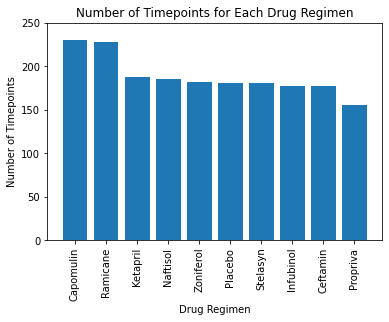

In [491]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints_cnt = clean_df['Drug Regimen'].value_counts()
plt.bar(timepoints_cnt.index, timepoints_cnt.values)
#the bar was higher than the ylim, so I changed the ylim
plt.ylim([0,250])
plt.ylabel('Number of Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.title('Number of Timepoints for Each Drug Regimen')
#timepoints_cnt.plot(kind="bar")
plt.show()

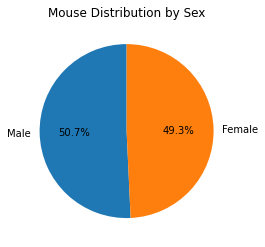

In [494]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df["Sex"].value_counts()
pie_plot = gender.plot.pie(autopct="%1.1f%%", startangle=90, title='Mouse Distribution by Sex')
pie_plot.set_ylabel('')
plt.show()

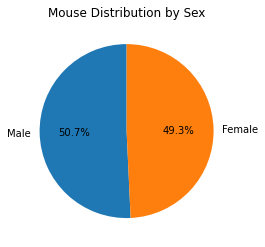

In [495]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_dist = clean_df['Sex'].value_counts()
plt.pie(gender_dist, labels=gender_dist.index.values, autopct = "%1.1f%%", startangle=90)
plt.title('Mouse Distribution by Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [445]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

timepoint_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max())

timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_tumor = pd.merge(clean_df, timepoint_df, on=('Mouse ID', 'Timepoint'), how='right')
mouse_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.9734,2
1,a251,Infubinol,Female,21,25,45,65.5257,1
2,a262,Placebo,Female,17,29,45,70.7176,4
3,a275,Ceftamin,Female,20,28,45,62.9994,3
4,a366,Stelasyn,Female,16,29,30,63.4407,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.7107,0
245,z578,Ramicane,Male,11,16,45,30.6387,0
246,z581,Infubinol,Female,24,25,45,62.7545,3
247,z795,Naftisol,Female,13,29,45,65.7411,3


In [446]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume = []

#write a for loop to count the total tumor volume for each treatment

for drug in drugs:
    #create a dataframe that uses loc to identify the drug name
    df = mouse_tumor.loc[mouse_tumor['Drug Regimen'] == drug]
    
    #append the tumor volumes for each mouse treated with a certain drug to the tumor_volume list
    values = df['Tumor Volume (mm3)']
    tumor_volume.append(values)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'{drug} IQR: {iqr}')
  
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'{drug} Lower Bound: {lower_bound}')
    print(f'{drug} Upper Bound: {upper_bound}')

    
    outliers_count = (values.loc[(df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'{drug} Outliers: {outliers_count}')
    

Capomulin IQR: 7.781863460000004
Capomulin Lower Bound: 20.70456164999999
Capomulin Upper Bound: 51.83201549
Capomulin Outliers: 0
Ramicane IQR: 9.098536719999998
Ramicane Lower Bound: 17.912664470000003
Ramicane Upper Bound: 54.30681135
Ramicane Outliers: 0
Infubinol IQR: 11.477135160000003
Infubinol Lower Bound: 36.83290494999999
Infubinol Upper Bound: 82.74144559000001
Infubinol Outliers: 1
Ceftamin IQR: 15.577752179999997
Ceftamin Lower Bound: 25.355449580000002
Ceftamin Upper Bound: 87.66645829999999
Ceftamin Outliers: 0


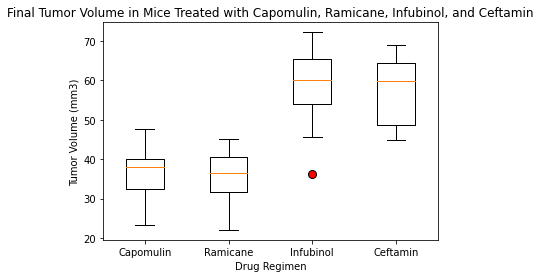

In [459]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(markerfacecolor='r', markersize = 8)

fig, ax = plt.subplots()

#make sure the boxplot includes flierprops to change the outlier 
plt.boxplot(tumor_volume, flierprops=flierprops)
#set x/y labels and title. 
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
#set x ticks to the drug regimen names
ax.set_xticklabels(drugs)
ax.set_title("Final Tumor Volume in Mice Treated with Capomulin, Ramicane, Infubinol, and Ceftamin")

plt.show()


## Line and Scatter Plots

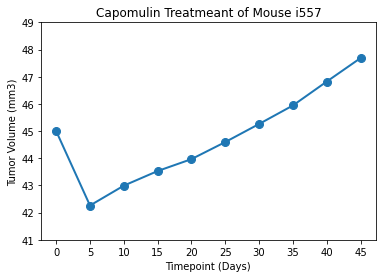

In [490]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#pick a random mouse
capomulin_mice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_mice.sample()
#capomulin_mice.sample() returned a single mouse ID (i557)

#I made a new dataframe using .loc to return all rows where mouse id = i557
i557_df = clean_df.loc[clean_df["Mouse ID"] == "i557",:]
i557_df

#make the line chart. I added markers to make the tumor volume at each timepoint clearer
plt.plot(i557_df['Timepoint'], i557_df['Tumor Volume (mm3)'], linewidth=2, markersize=8, marker = 'o')
#set x axis to equal timepoints
plt.xticks(i557_df["Timepoint"].values)
#I thought the y limits were weird (they were 42-47), so I changed them
#although 40-50 would have been good ylims from a labeling perspective, the resulting graph was squished
#so I went with 41-49
plt.ylim([41, 49])

#label her
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatmeant of Mouse i557')
plt.show()


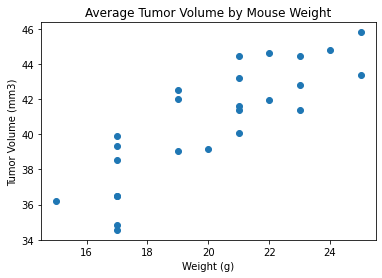

In [493]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice

#create new dataframe using group by mouse ID and mean to calculate average tumor size/mouse weight for each mouse
cap_avg = capomulin_mice.groupby(['Mouse ID']).mean()
cap_avg

plt.scatter(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Mouse Weight')
plt.show()


## Correlation and Regression

The correlation coefficient for the relationship between mouse weight and tumor volume is 0.84


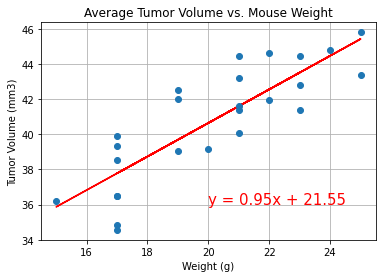

In [516]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
print(f'The correlation coefficient for the relationship between mouse weight and tumor volume is {round(correlation[0],2)}')

#get stats from linear regression.
model = st.linregress(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
#model - I tryped model to print all values, ensuring the st.linregress worked

#write code to define the line
line=model.slope*(cap_avg['Weight (g)']) + model.intercept
#I wanted to add a feature that described the slope, so I wrote the below code
equation = "y = " + str(round(model.slope,2)) + "x + " + str(round(model.intercept,2))

#plot it like it's hot
#I used the z order function to pull the scatter plot points in front of the grid and the line 
#(the line was blocking a few values)
plt.scatter(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'], zorder=+3.0)
plt.plot(cap_avg['Weight (g)'], line, color ="red")
#I used z order again to push the grid back below the trend line
plt.grid(True, zorder=-1.0)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Mouse Weight')
#I wanted to add the slope here
plt.annotate(equation,(20,36),fontsize=15,color="red")
plt.show()

